In [1]:
from PoseClasses import *
import matplotlib as mpl
import matplotlib.patches as patches
import cv2
from PIL import Image
# matplotlib.use('TkAgg')
%matplotlib inline
%reload_ext autoreload
%autoreload 2
sns.set_context('paper',font_scale=1.5)
# sns.set_context('talk', font_scale=1)
mpl.rcParams['figure.figsize'] = (12, 6)

In [26]:
# path = Path('/Users/luca/Box/Spinal Stim/Alphapose/')
path = Path('/Volumes/RTO/Spinal Stim/VideoAnalysis/AlphaPose')
print(path)
os.listdir(path)

/Volumes/RTO/Spinal Stim/VideoAnalysis/AlphaPose


['json', 'frames', 'h5Poses', 'json_noTracking.tar', '.DS_Store', 'videos']

In [46]:
#convert video into frames
videofile = 'SS07_Pre_SSV1_No Brace_Cropped.mp4' #video to process


videopath = Path('/Volumes/RTO/Spinal Stim/VideoAnalysis/DLC/Videos')
videopath = (videopath/videofile).as_posix()
framepath = path/'frames/'/Path(videofile).stem
print(videopath, '\n', framepath)
FrameCapture(pathIn=videopath, pathOut=framepath)

/Volumes/RTO/Spinal Stim/VideoAnalysis/DLC/Videos/SS07_Pre_SSV1_No Brace_Cropped.mp4 
 /Volumes/RTO/Spinal Stim/VideoAnalysis/AlphaPose/frames/SS07_Pre_SSV1_No Brace_Cropped
False


In [19]:
#json file with poses

# filename = 'fastpose_halpe26-results.json'
# filename = 'fastpose_coco-results.json'
# filename = 'AlphaPose_SS02_3FU_SSV1_Brace_Cropped-results.json' #HALPE 26
filename = 'Pose_track_SS07_Pre_SSV1_No Brace_Cropped.json'#HALPE 26 with Pose Track
# filename = 'fastpose_halpe26-results-OPformat.json' #HALPE 26 Open Pose Format (images)
# filename = 'AlphaPose_SS02_3FU_SSV1_Brace_Cropped-results-OPformat.json' #HALPE 26 Open Pose Format (video)
# filename = 'alphapose-results.json'

In [48]:
filename = Path(videofile).stem
print(filename)

SS07_Pre_SSV1_No Brace_Cropped


# Raw json data

In [50]:
file = path/'json'/Path(filename+'.json')
print(file)
with open(file) as f:
    data=json.load(f)
print(len(data)) #each list item is the set of keypoints for a person in an image

/Volumes/RTO/Spinal Stim/VideoAnalysis/AlphaPose/json/SS07_Pre_SSV1_No Brace_Cropped.json
1413


In [51]:
data[0].keys()

dict_keys(['image_id', 'category_id', 'keypoints', 'score', 'box', 'idx'])

In [52]:
# for i in range(len(data)):
#     print(i, data[i]['image_id'], data[i]['category_id'], data[i]['idx'], data[i]['box'])

In [53]:
video_size=(1280,720)
df = pd.DataFrame(data)
df['box_area'] = df.box.apply(lambda x:x[2]*x[3])
df['box_dist_center'] = df.box.apply(lambda x: np.abs(x[0]+x[2]/2 - video_size[0]/2) )
df.reset_index(inplace=True)
df.head(10)

,index,image_id,category_id,keypoints,score,box,idx,box_area,box_dist_center
0,0,0.jpg,1,"[473.46197509765625, 32.985328674316406, 0.070...",2.902063,"[261.7996826171875, 28.66490364074707, 441.840...",1,279250.051636,157.279999
1,1,0.jpg,1,"[292.0753479003906, 47.109375, 0.0701671242713...",2.504186,"[5.086862564086914, 0.0, 299.7582092285156, 72...",2,215825.910645,485.034033
2,2,0.jpg,1,"[1018.4375, 97.16194915771484, 0.2120703607797...",1.651192,"[994.19677734375, 82.24040985107422, 42.407592...",3,961.156481,375.400574
3,3,1.jpg,1,"[478.3230285644531, 36.503116607666016, 0.0503...",2.811740,"[267.2378910069092, 31.510556411743153, 438.60...",1,275188.704643,153.458527
4,4,1.jpg,1,"[265.01385498046875, 54.14061737060547, 0.0540...",2.617992,"[5.920739489262644, 0.0, 299.7920628915919, 72...",2,215850.285282,484.183229
5,5,1.jpg,1,"[1015.9647827148438, 97.0703353881836, 0.39477...",1.523689,"[992.0888174245916, 82.22650604248047, 43.1033...",3,994.028772,373.640491
6,6,2.jpg,1,"[477.1249694824219, 39.787261962890625, 0.0262...",2.832279,"[267.7321419102067, 34.607419744595916, 437.20...",1,273283.526689,153.667305
7,7,2.jpg,1,"[296.4556884765625, 47.10936737060547, 0.05008...",2.488513,"[8.51179319536422, 0.0, 300.0508974752663, 720.0]",2,216036.646182,481.462758
8,8,2.jpg,1,"[1013.4274291992188, 96.9919662475586, 0.29244...",1.220197,"[990.2757090578816, 81.74618510411474, 44.4172...",3,1057.917712,372.484309
9,9,3.jpg,1,"[440.856689453125, -23.373659133911133, 0.0260...",2.924074,"[266.74173102126423, 34.43507121295488, 440.35...",1,277357.730789,153.082358


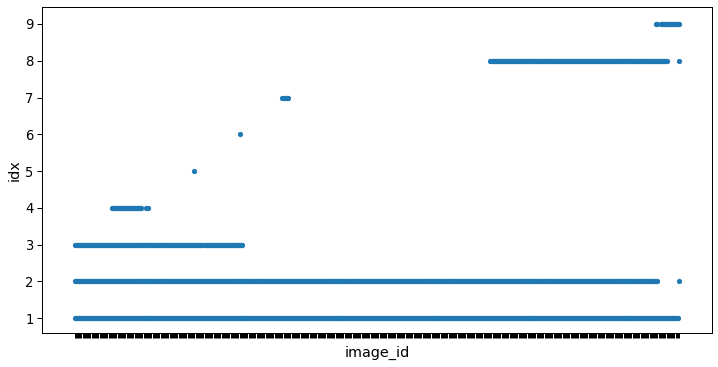

In [55]:
fig, ax = plt.subplots(1,1)
for i in df.idx.unique():
    df.query('idx==@i').plot.scatter(x='image_id',y='idx', ax=ax)
#     if i == 1:
#         ax2=ax.twinx()
#         df.query('idx==@i').plot(x='image_id', y='box_dist_center', ax=ax2)
    
aa=ax.set_xticklabels(ax.get_xticklabels(), rotation='vertical')


In [73]:
df.groupby('idx')['image_id'].count().sort_values(ascending=False)

idx
1    535
2    517
8    158
3    148
4     29
9     19
7      5
6      1
5      1
Name: image_id, dtype: int64

In [64]:
# (df.groupby(['idx'])['box_area','box_dist_center'].mean())
(df.groupby(['idx'])['box_dist_center'].mean())

idx
1     93.462091
2    303.093216
3    288.474021
4    551.105708
5    249.735229
6     68.018646
7    221.559916
8    324.015221
9     40.036957
Name: box_dist_center, dtype: float64

In [82]:
#1. sort by id count (most present in video)
ids = (df.groupby('idx')['image_id'].count().sort_values(ascending=False).index[:2])
#2. pick closest to center
patient_id = (df.groupby(['idx'])['box_dist_center'].mean()).loc[ids].sort_values().index[0]

In [85]:
df.query('idx==@patient_id')#.box_dist_center.plot()

,index,image_id,category_id,keypoints,score,box,idx,box_area,box_dist_center
0,0,0.jpg,1,"[473.46197509765625, 32.985328674316406, 0.070...",2.902063,"[261.7996826171875, 28.66490364074707, 441.840...",1,279250.051636,157.279999
3,3,1.jpg,1,"[478.3230285644531, 36.503116607666016, 0.0503...",2.811740,"[267.2378910069092, 31.510556411743153, 438.60...",1,275188.704643,153.458527
6,6,2.jpg,1,"[477.1249694824219, 39.787261962890625, 0.0262...",2.832279,"[267.7321419102067, 34.607419744595916, 437.20...",1,273283.526689,153.667305
9,9,3.jpg,1,"[440.856689453125, -23.373659133911133, 0.0260...",2.924074,"[266.74173102126423, 34.43507121295488, 440.35...",1,277357.730789,153.082358
12,12,4.jpg,1,"[484.822509765625, -35.989688873291016, 0.0162...",2.816337,"[262.8068715494251, 32.57228858434593, 445.173...",1,284428.985752,154.606533
...,...,...,...,...,...,...,...,...,...
1403,1403,531.jpg,1,"[557.0308227539062, 29.612070083618164, 0.0429...",2.536452,"[218.96729426254862, 52.343440499306496, 386.7...",1,239322.459810,227.671476
1405,1405,532.jpg,1,"[619.8050537109375, 34.15242385864258, 0.02653...",2.623927,"[199.9450618872303, 42.92082517788077, 395.462...",1,253545.595559,242.323901
1407,1407,533.jpg,1,"[473.77081298828125, 31.324628829956055, 0.041...",2.519603,"[211.09999911862977, 45.824135322376435, 392.0...",1,250056.653298,232.895628
1409,1409,534.jpg,1,"[435.7660827636719, 8.793158531188965, 0.01962...",2.468791,"[213.72037074843558, 36.51118510821766, 401.07...",1,262872.353013,225.741599


In [245]:
df.loc[0].box[0]+df.loc[0].box[2]/2

576.4865570068359

# Parse json to plot joint trajectories

In [96]:
filepath = file
print(filepath,'\n',framepath)
# file.as_posix()

/Volumes/RTO/Spinal Stim/VideoAnalysis/AlphaPose/json/SS07_Pre_SSV1_No Brace_Cropped.json 
 /Volumes/RTO/Spinal Stim/VideoAnalysis/AlphaPose/frames/SS07_Pre_SSV1_No Brace_Cropped


In [100]:
# filename = 'AlphaPose_SS02_3FU_SSV1_Brace_Cropped-results.json' #HALPE 26
# framepath = path/'Frames/'

#parse poses into file
poses = json_to_csv_pose(filepath)

/Volumes/RTO/Spinal Stim/VideoAnalysis/AlphaPose/json/SS07_Pre_SSV1_No Brace_Cropped.json


In [98]:
poses.columns

Index(['Videoname', 'box', 'box_area', 'RHip_x', 'RHip_y', 'RHip_c', 'RKnee_x',
       'RKnee_y', 'RKnee_c', 'RAnkle_x', 'RAnkle_y', 'RAnkle_c', 'LHip_x',
       'LHip_y', 'LHip_c', 'LKnee_x', 'LKnee_y', 'LKnee_c', 'LAnkle_x',
       'LAnkle_y', 'LAnkle_c', 'LBigToe_x', 'LBigToe_y', 'LBigToe_c',
       'LSmallToe_x', 'LSmallToe_y', 'LSmallToe_c', 'LHeel_x', 'LHeel_y',
       'LHeel_c', 'RBigToe_x', 'RBigToe_y', 'RBigToe_c', 'RSmallToe_x',
       'RSmallToe_y', 'RSmallToe_c', 'RHeel_x', 'RHeel_y', 'RHeel_c'],
      dtype='object')

In [104]:
#index is frame #
poses.sort_index(ascending=True,inplace=True)
poses.head()

,Videoname,box,box_area,RHip_x,RHip_y,RHip_c,RKnee_x,RKnee_y,RKnee_c,RAnkle_x,...,LHeel_c,RBigToe_x,RBigToe_y,RBigToe_c,RSmallToe_x,RSmallToe_y,RSmallToe_c,RHeel_x,RHeel_y,RHeel_c
0,SS07_Pre_SSV1_No Brace_Cropped,"[261.7996826171875, 28.66490364074707, 441.840...",279250.051636,393.225647,131.737717,0.781674,498.150055,378.618683,0.919500,566.042297,...,0.845927,677.138733,600.811523,1.006850,658.622681,625.499634,0.835351,553.698303,619.327637,0.838355
1,SS07_Pre_SSV1_No Brace_Cropped,"[267.2378910069092, 31.510556411743153, 438.60...",275188.704643,398.816742,134.356995,0.837292,502.786499,378.991699,0.926013,570.061035,...,0.809622,680.146667,605.278809,0.987475,661.799072,629.742249,0.847473,551.713440,623.626404,0.912326
2,SS07_Pre_SSV1_No Brace_Cropped,"[267.7321419102067, 34.607419744595916, 437.20...",273283.526689,397.857147,137.347626,0.848823,507.612579,381.248535,0.905572,574.685303,...,0.803489,684.440735,612.954407,1.009347,666.148132,631.246948,0.864986,550.295227,625.149414,0.880687
3,SS07_Pre_SSV1_No Brace_Cropped,"[266.74173102126423, 34.43507121295488, 440.35...",277357.730789,403.854340,143.136917,0.845716,508.694336,389.819244,0.946402,570.364929,...,0.867273,681.371948,624.167480,1.075776,669.037842,642.668640,0.835630,551.863708,630.334534,0.936907
4,SS07_Pre_SSV1_No Brace_Cropped,"[262.8068715494251, 32.57228858434593, 445.173...",284428.985752,406.507812,142.567810,0.819094,513.015808,386.909637,0.916146,569.402344,...,0.839610,675.910339,631.251465,0.961572,657.114807,650.046997,0.849309,550.606873,631.251465,0.952365


In [105]:
poses['Filename'] = poses.index
poses['Filename'] = poses.Filename.apply(lambda x:str(x)+'.jpg')

In [106]:
print(poses.loc[0].box_area)
print(poses.loc[0].box)

279250.05163573846
[261.7996826171875, 28.66490364074707, 441.84063720703125, 632.0153198242188]


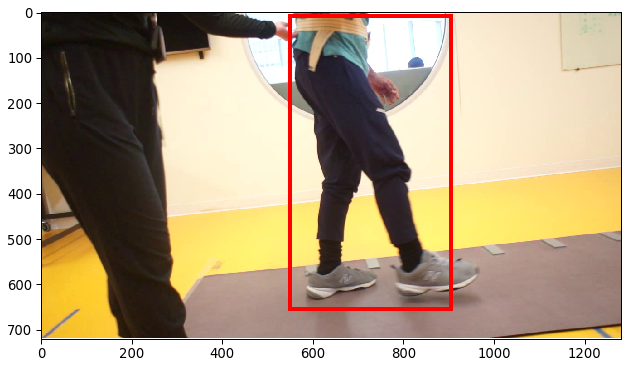

In [108]:
#render bounding box on a frame, along with the frame
frame = 150
#show image
filename = poses.loc[frame]['Filename']
img = Image.open(framepath/filename)

fig, ax = plt.subplots(1,1)
# im = np.array(Image.open(img3))
ax.imshow(img)

# jointsX = poses.iloc[:,1::3]
# jointsY = poses.iloc[:,2::3]
# for x,y in zip(jointsX, jointsY):
#     ax.scatter(x=poses[x], y=poses[y], s=100)
    
# plt.legend(jointsX)

x1,y1 = poses.loc[frame]['box'][:2]
width,height = poses.loc[frame]['box'][2:4]
rect = patches.Rectangle((x1,y1),width, height, linewidth=4,edgecolor='r',facecolor='none')
ax.add_patch(rect)


In [16]:
# plt.scatter(x=poses.box.apply(lambda x:x[0]), y=poses.box.apply(lambda x:x[1]))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f85fbaaaad0>,
      dtype=object)

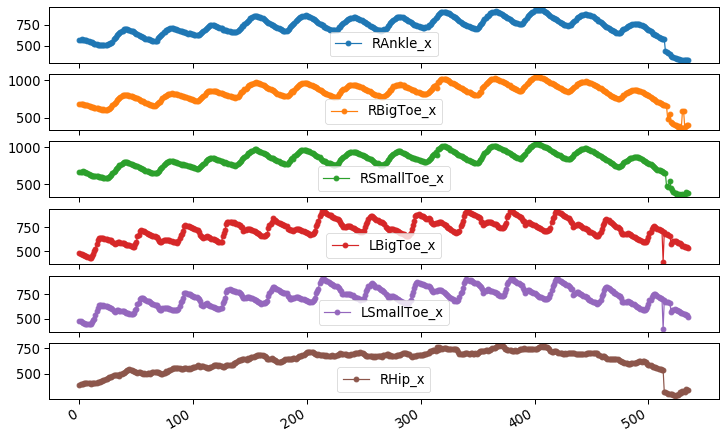

In [112]:
poses[['RAnkle_x','RBigToe_x','RSmallToe_x','LBigToe_x','LSmallToe_x', 'RHip_x']].plot(figsize=(12,8), subplots=True, marker='o')

In [110]:
poses['time'] = poses.index/30

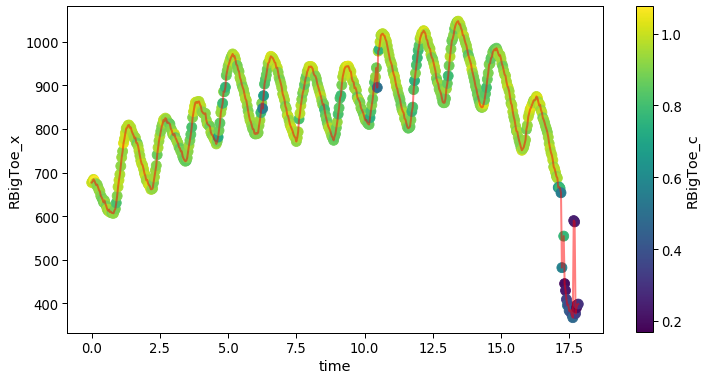

In [111]:
jointsX = ['RAnkle_x','RBigToe_x','RSmallToe_x','LSmallToe_x', 'RHip_x'] 
jointsY = ['RAnkle_y','RBigToe_y','RSmallToe_y','LSmallToe_y', 'RHip_y'] 
jointsC = ['RAnkle_c','RBigToe_c','RSmallToe_c','LSmallToe_c', 'RHip_c'] 
fig,ax = plt.subplots(1,1)
poses['time'] = poses.index/30
poses.plot.scatter(x='time', y=jointsX[1], c=jointsC[1], colormap='viridis',ax=ax, s=100)
# poses.plot.scatter(x='time', y='LBigToe_x', c='LBigToe_c', colormap='viridis',ax=ax)

ax.plot(poses['time'], poses[jointsX[1]], alpha=0.5, linewidth=2, c='red')
# ax.plot(poses['time'], poses['LBigToe_x'], alpha=0.5, linewidth=2, c='blue')


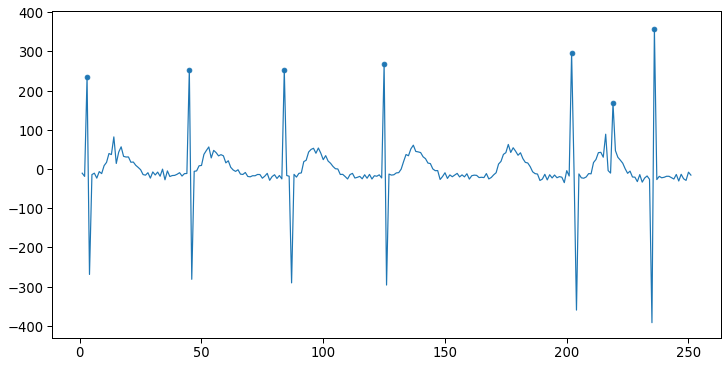

In [24]:
j ='RBigToe_x'
vel = poses[j].diff()
vel.plot()
pks,_= find_peaks(vel, height=100)
plt.scatter(pks, vel[pks])
outlier_frames = pks

In [68]:
#CONVERT TO DLC FORMAT
newnames = ['Left Hip',
 'Left Knee',
 'Left Ankle',
 'Left Heel',
 'Left Toe',
 'Right Hip',
 'Right Knee',
 'Right Ankle',
 'Right Heel',
 'Right Toe']

oldnames = ['LHip','LKnee','LAnkle','LHeel','LBigToe','RHip','RKnee','RAnkle','RHeel','RBigToe']

df = pd.DataFrame()

for old,new in zip(oldnames, newnames):
    cols1 = np.tile([new],3)
    print(old,new)
    cols2 = ['x','y','likelihood'] #new levels
    arrays = [np.array(cols1),np.array(cols2)]
    index = pd.MultiIndex.from_arrays(arrays, names=['bodyparts','coords'])    
    cols = [c for c in poses.columns if old in c]
    df_ = pd.DataFrame(poses[cols].values,  columns=index)
    df = pd.concat((df,df_),axis=1)

LHip Left Hip
LKnee Left Knee
LAnkle Left Ankle
LHeel Left Heel
LBigToe Left Toe
RHip Right Hip
RKnee Right Knee
RAnkle Right Ankle
RHeel Right Heel
RBigToe Right Toe


### Show outlier frames
Motion blur is probably causing problems 

<Figure size 864x432 with 0 Axes>

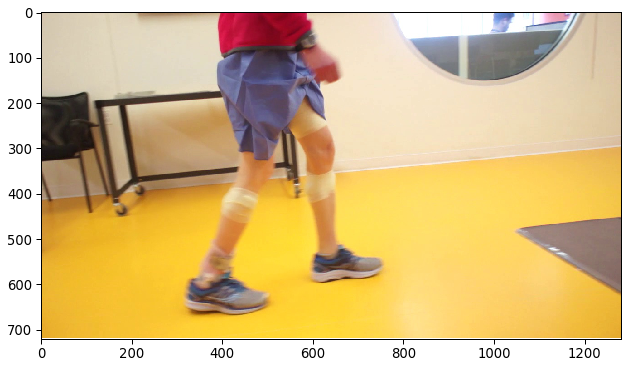

<Figure size 864x432 with 0 Axes>

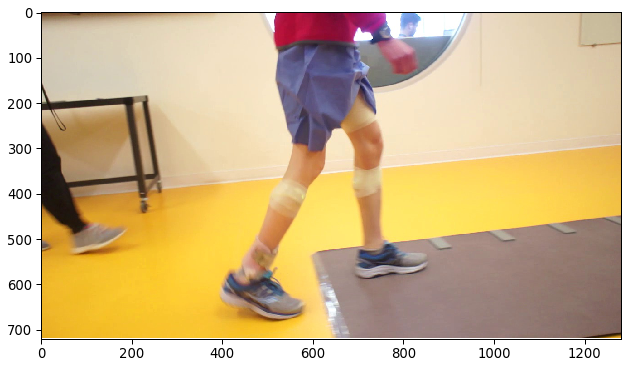

<Figure size 864x432 with 0 Axes>

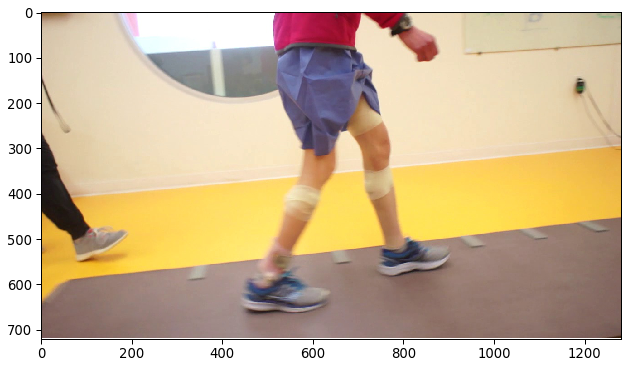

<Figure size 864x432 with 0 Axes>

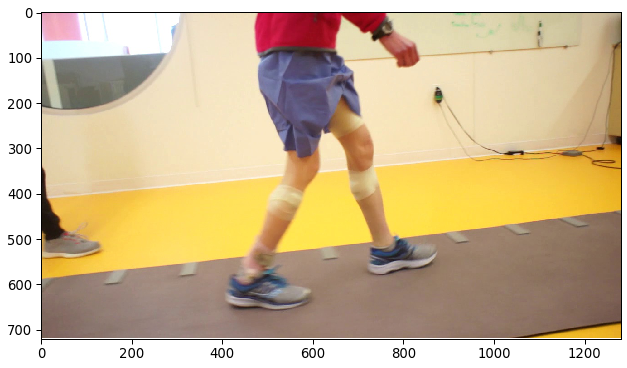

<Figure size 864x432 with 0 Axes>

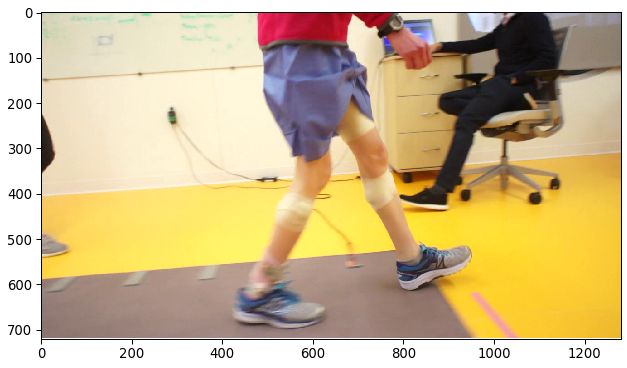

<Figure size 864x432 with 0 Axes>

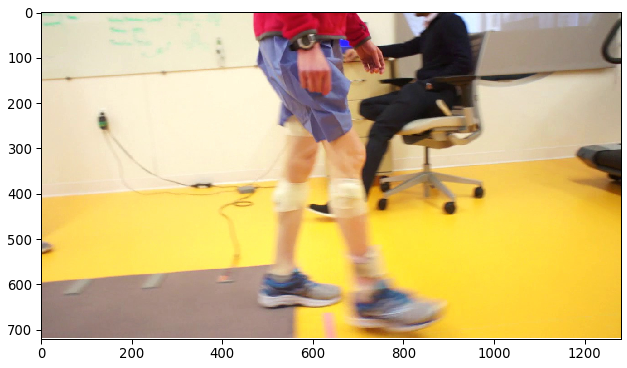

<Figure size 864x432 with 0 Axes>

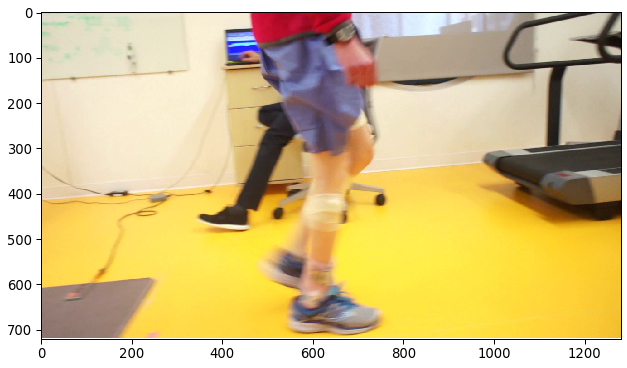

In [25]:
# %matplotlib qt
for frame in outlier_frames:
    filename = poses.loc[frame]['Filename']
    img = Image.open(framepath/filename)
    plt.figure()
    fig, ax = plt.subplots(1,1)
    ax.imshow(img)


Single Image

In [91]:
# filename = 'fastpose_halpe26-results.json'
filename = 'AlphaPose_SS02_3FU_SSV1_Brace_Cropped-results.json'

file = path/filename
print(file)
with open(file) as f:
    data=json.load(f)
print(len(data)) #each list item is the set of keypoints for a person in an image

/Users/luca/Box/Spinal Stim/Alphapose/AlphaPose_SS02_3FU_SSV1_Brace_Cropped-results.json
596


In [92]:
data[0].keys()

dict_keys(['image_id', 'category_id', 'keypoints', 'score', 'box', 'idx'])

In [93]:
for i in range(len(data)):
    print(i, data[i]['image_id'], data[i]['category_id'], data[i]['idx'], data[i]['box'])

0 0.jpg 1 [0.0] [365.3081970214844, 25.05078887939453, 422.3567199707031, 631.1913986206055]
1 0.jpg 1 [0.0] [1005.5302124023438, 1.8379613161087036, 62.29229736328125, 47.47571361064911]
2 1.jpg 1 [0.0] [362.67633056640625, 31.705129623413086, 405.53118896484375, 625.7943820953369]
3 1.jpg 1 [0.0] [1000.5616455078125, 1.4529579877853394, 65.2186279296875, 48.817397236824036]
4 2.jpg 1 [0.0] [352.8103332519531, 9.607318878173828, 397.6873474121094, 612.8937187194824]
5 2.jpg 1 [0.0] [993.9783935546875, 2.8202738761901855, 57.6884765625, 48.307655811309814]
6 3.jpg 1 [0.0] [349.1979675292969, 16.021760940551758, 393.1154479980469, 601.445707321167]
7 3.jpg 1 [0.0] [989.49267578125, 2.6165449619293213, 60.1461181640625, 48.11182951927185]
8 4.jpg 1 [0.0] [299.1792907714844, 13.779425621032715, 444.3457946777344, 647.8856134414673]
9 4.jpg 1 [0.0] [984.6151733398438, 1.2306615114212036, 63.45001220703125, 49.64471232891083]
10 5.jpg 1 [0.0] [281.4930419921875, 13.321147918701172, 464.1595

349 147.jpg 1 [0.0] [3.2352406978607178, 23.7109375, 113.07554268836975, 509.33056640625]
350 148.jpg 1 [0.0] [333.1602783203125, 23.436471939086914, 593.1934814453125, 587.6585597991943]
351 148.jpg 1 [0.0] [3.7941782474517822, 18.529760360717773, 108.89908957481384, 516.5606937408447]
352 149.jpg 1 [0.0] [325.607421875, 16.103483200073242, 597.4727172851562, 596.7638874053955]
353 149.jpg 1 [0.0] [5.016748428344727, 6.8693461418151855, 98.46049308776855, 537.0582661628723]
354 150.jpg 1 [0.0] [337.65753173828125, 13.8762788772583, 573.3812255859375, 597.4100980758667]
355 150.jpg 1 [[0.0], [0.0]] [1.5579665899276733, 0.0, 45.857797265052795, 551.0463256835938]
356 151.jpg 1 [0.0] [345.92877197265625, 0.0, 487.79669189453125, 627.92431640625]
357 151.jpg 1 [0.0] [1.0220075845718384, 2.659109115600586, 46.1265252828598, 545.1594333648682]
358 152.jpg 1 [0.0] [358.15228271484375, 0.0, 471.30047607421875, 632.0928344726562]
359 152.jpg 1 [0.0] [1.1996018886566162, 29.763120651245117, 41.

In [94]:
df = pd.DataFrame(data)
df['box_area'] = df.box.apply(lambda x:x[2]*x[3])
df['x_box']=df.box.apply(lambda x:x[0])
df    

,image_id,category_id,keypoints,score,box,idx,box_area,x_box
0,0.jpg,1,"[539.502685546875, -53.84814453125, 0.00791434...",2.585824,"[365.3081970214844, 25.05078887939453, 422.356...",[0.0],266587.928795,365.308197
1,0.jpg,1,"[1052.4927978515625, 26.792465209960938, 0.713...",1.785529,"[1005.5302124023438, 1.8379613161087036, 62.29...",[0.0],2957.371270,1005.530212
2,1.jpg,1,"[696.834228515625, 84.87324523925781, 0.015485...",2.628753,"[362.67633056640625, 31.705129623413086, 405.5...",[0.0],253779.139819,362.676331
3,1.jpg,1,"[1047.1827392578125, 27.984657287597656, 0.741...",1.781739,"[1000.5616455078125, 1.4529579877853394, 65.21...",[0.0],3183.803667,1000.561646
4,2.jpg,1,"[611.5068969726562, -67.00439453125, 0.0283736...",2.548030,"[352.8103332519531, 9.607318878173828, 397.687...",[0.0],243740.077243,352.810333
...,...,...,...,...,...,...,...,...
591,250.jpg,1,"[633.5070190429688, 25.225738525390625, 0.0581...",2.745626,"[241.864013671875, 40.814369201660156, 547.872...",[0.0],338581.850683,241.864014
592,250.jpg,1,"[439.8240966796875, 84.09588623046875, 0.32776...",1.581242,"[181.0659637451172, 151.87921142578125, 274.48...",[0.0],88358.044276,181.065964
593,251.jpg,1,"[630.830322265625, 38.12179183959961, 0.056060...",2.528831,"[254.71446228027344, 56.707923889160156, 526.1...",[0.0],308462.511173,254.714462
594,251.jpg,1,"[634.318603515625, 73.87420654296875, 0.019690...",1.523283,"[318.168701171875, 76.43673706054688, 379.9735...",[0.0],172887.662070,318.168701


In [96]:
df.query('image_id=="0.jpg"')

,image_id,category_id,keypoints,score,box,idx,box_area,x_box
0,0.jpg,1,"[539.502685546875, -53.84814453125, 0.00791434...",2.585824,"[365.3081970214844, 25.05078887939453, 422.356...",[0.0],266587.928795,365.308197
1,0.jpg,1,"[1052.4927978515625, 26.792465209960938, 0.713...",1.785529,"[1005.5302124023438, 1.8379613161087036, 62.29...",[0.0],2957.371270,1005.530212


In [52]:
#assume patient is more central in each frame
df = df[['image_id','x_box','box_area','keypoints']].groupby(['image_id']).max()
df

,x_box,box_area,keypoints
image_id,,,
0.jpg,1005.530212,266587.928795,"[1052.4927978515625, 26.792465209960938, 0.713..."
1.jpg,1000.561646,253779.139819,"[1047.1827392578125, 27.984657287597656, 0.741..."
10.jpg,954.624573,238178.529831,"[997.281005859375, 31.19234848022461, 0.710032..."
100.jpg,445.520721,254724.081238,"[623.52099609375, -57.69636917114258, 0.009180..."
101.jpg,441.937775,251158.163625,"[620.1565551757812, -55.41102981567383, 0.0104..."
...,...,...,...
95.jpg,447.420532,183967.365651,"[649.9586181640625, 46.699615478515625, 0.0114..."
96.jpg,447.321533,178203.456953,"[708.716796875, 94.41560363769531, 0.006895491..."
97.jpg,440.995636,198373.645467,"[674.4832153320312, 92.61032104492188, 0.00567..."


In [109]:
for i,k in zip(df.index,df.keypoints):
    print(i,k)

img000_res.png [111.3531265258789, -12.529206275939941, 0.009640210308134556, 43.17270278930664, 4.315367698669434, 0.011748396791517735, 65.63213348388672, 5.919612407684326, 0.007045868318527937, 100.92552947998047, 166.3441162109375, 0.016440650448203087, 76.05973052978516, -15.737696647644043, 0.010631171055138111, 67.23638153076172, 2.711122512817383, 0.35165438055992126, 76.86185455322266, -2.1016130447387695, 0.09605566412210464, 70.44486999511719, 4.315367698669434, 0.7268486618995667, 80.07034301757812, 4.315367698669434, 0.6950212121009827, 89.69581604003906, 25.17055320739746, 0.5429614782333374, 91.30005645751953, 26.774799346923828, 0.8782065510749817, 75.25760650634766, 29.98328971862793, 0.8032165169715881, 83.2788314819336, 28.379043579101562, 0.8055620789527893, 81.67459106445312, 87.73611450195312, 0.924079954624176, 102.52977752685547, 87.73611450195312, 0.8725200891494751, 60.819400787353516, 147.0931854248047, 0.8174476623535156, 99.3212890625, 158.32289123535156, 

In [103]:
d = {}
for i,k in enumerate(df['keypoints']):
    print(i,k)
    

0 [111.3531265258789, -12.529206275939941, 0.009640210308134556, 43.17270278930664, 4.315367698669434, 0.011748396791517735, 65.63213348388672, 5.919612407684326, 0.007045868318527937, 100.92552947998047, 166.3441162109375, 0.016440650448203087, 76.05973052978516, -15.737696647644043, 0.010631171055138111, 67.23638153076172, 2.711122512817383, 0.35165438055992126, 76.86185455322266, -2.1016130447387695, 0.09605566412210464, 70.44486999511719, 4.315367698669434, 0.7268486618995667, 80.07034301757812, 4.315367698669434, 0.6950212121009827, 89.69581604003906, 25.17055320739746, 0.5429614782333374, 91.30005645751953, 26.774799346923828, 0.8782065510749817, 75.25760650634766, 29.98328971862793, 0.8032165169715881, 83.2788314819336, 28.379043579101562, 0.8055620789527893, 81.67459106445312, 87.73611450195312, 0.924079954624176, 102.52977752685547, 87.73611450195312, 0.8725200891494751, 60.819400787353516, 147.0931854248047, 0.8174476623535156, 99.3212890625, 158.32289123535156, 0.87372958660

In [34]:
#ADD Person ID field
#INIT
person_id = -1
image_id = ''
# data[0].update({'person_id':0})

for i in np.arange(len(data)):
    
    curr_image_id = data[i]['image_id'] #current frame #
    
    if curr_image_id == image_id: #same frame, new person
        person_id+=1
        data[i].update({'person_id':person_id})
    else: #new frame, reset person id
        person_id = 0
        data[i].update({'person_id':person_id})
        
    image_id = curr_image_id 

In [15]:
# #test it
# for i in range(10):
#     print(data[i]['image_id'], data[i]['person_id'])

In [16]:
#extract keypoints for person id 0
keypoints = [d['keypoints'] for d in data if d['person_id']==1]
print(len(keypoints)) # tot # of frames

2


In [17]:
#image file names
frame_name = [d['image_id'] for d in data if d['person_id']==0]
frame_name

['img000_res.png', 'img191_res.png']

In [33]:
from PIL import Image
img = Image.open(path/frame_name[0])

In [19]:
type(img)

PIL.PngImagePlugin.PngImageFile

In [20]:
img3 = np.array(img)
img3.shape

(192, 256, 3)

In [21]:
keypoints0 = keypoints[0]
print(len(keypoints0)/3)

26.0


In [22]:
def keypoint_dict(keys = ['RHip', 'RKnee', 'RAnkle', 'LHip','LKnee', 'LAnkle', 'LBigToe', 'LHeel', 'RBigToe','RHeel']):
    d =     {0:  "Nose",
    1:  "LEye",
    2:  "REye",
    3:  "LEar",
    4:  "REar",
    5:  "LShoulder",
    6:  "RShoulder",
    7:  "LElbow",
    8:  "RElbow",
    9:  "LWrist",
    10: "RWrist",
    11: "LHip",
    12: "RHip",
    13: "LKnee",
    14: "RKnee",
    15: "LAnkle",
    16: "RAnkle",
    17:  "Head",
    18:  "Neck",
    19:  "Hip",
    20: "LBigToe",
    21: "RBigToe",
    22: "LSmallToe",
    23: "RSmallToe",
    24: "LHeel",
    25: "RHeel"}

    bodyparts = {v:k for k,v in d.items()}
    #the subset of bodyparts we want to extract and their array indices in OpenPose
    dict_bp = {}
    values = [bodyparts.get(b) for b in keys]
    kv = zip(keys,values)
    for k,v in kv:
        dict_bp.update({k+'_x':v*3})
        dict_bp.update({k+'_y':v*3+1})
        dict_bp.update({k+'_c':v*3+2})

    return dict_bp



In [23]:
dict_bp = keypoint_dict()

In [24]:
poses = pd.DataFrame() #store poses for all frames
d = {'Filename':Path(path/frame_name[0]).stem}
#parse pose file for desired keypoints
for k,v in dict_bp.items():
    d.update({k:keypoints0[v]})
#append
poses = pd.concat((poses,pd.DataFrame(d, index=[0])))
poses

,Filename,RHip_x,RHip_y,RHip_c,RKnee_x,RKnee_y,RKnee_c,RAnkle_x,RAnkle_y,RAnkle_c,...,LBigToe_c,LHeel_x,LHeel_y,LHeel_c,RBigToe_x,RBigToe_y,RBigToe_c,RHeel_x,RHeel_y,RHeel_c
0,img000_res,83.278831,28.379044,0.805562,102.529778,87.736115,0.87252,99.321289,158.322891,0.87373,...,0.703135,54.40242,155.11441,0.793926,121.780716,166.344116,0.904179,92.904305,167.948364,0.907716


In [59]:
#person coords
x1,y1 = data[1]['box'][:2]
width,height = data[1]['box'][2:4]
print(x1,y1)
print(x2,y2)

45.512691497802734 4.7966437339782715
86.76201248168945 164.27469110488892


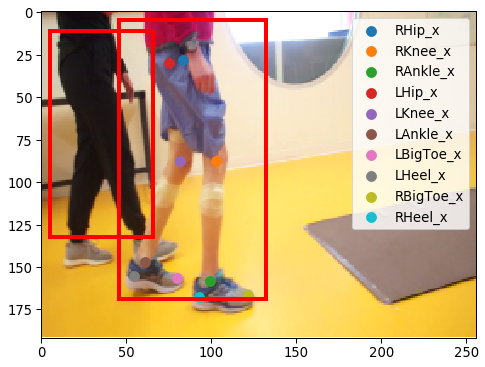

In [65]:
fig, ax = plt.subplots(1,1)
# im = np.array(Image.open(img3))
ax.imshow(img3)

jointsX = poses.iloc[:,1::3]
jointsY = poses.iloc[:,2::3]
for x,y in zip(jointsX, jointsY):
    ax.scatter(x=poses[x], y=poses[y], s=100)
    
plt.legend(jointsX)

for p in range(2):
    x1,y1 = data[p]['box'][:2]
    width,height = data[p]['box'][2:4]
    rect = patches.Rectangle((x1,y1),width, height, linewidth=4,edgecolor='r',facecolor='none')
    ax.add_patch(rect)
# plt.scatter(x=poses.RHip_x, y=poses.RHip_y, s=40)
# jointsX

In [ ]:
rect = patches.Rectangle((data[0]['box']))

In [42]:
x1,y1 = data[0]['box'][:2]
x2,y2 = data[0]['box'][2:4]


4.8530755043029785 10.960822105407715
61.054410457611084 121.26165103912354


In [395]:
# keypoints[0]

In [388]:
# result = map(lambda x:int(x.strip('.jpg')), frame_nr)
# list(result)

['img000_res', 'img191_res']

In [302]:
data[0].update({'person_id':0})

In [303]:
data[0]

{'image_id': '0.jpg',
 'category_id': 1,
 'keypoints': [539.502685546875,
  -53.84814453125,
  0.007914349436759949,
  733.6680297851562,
  72.51341247558594,
  0.004619631916284561,
  702.84814453125,
  103.33331298828125,
  0.0028822331223636866,
  622.7164306640625,
  66.34944152832031,
  0.047200459986925125,
  684.356201171875,
  66.34944152832031,
  0.006908390671014786,
  425.4690856933594,
  23.201587677001953,
  0.06516273319721222,
  536.4207153320312,
  35.529544830322266,
  0.034950561821460724,
  548.7486572265625,
  10.87363052368164,
  0.22105979919433594,
  548.7486572265625,
  17.037609100341797,
  0.27973127365112305,
  628.88037109375,
  54.021480560302734,
  0.9141169786453247,
  628.88037109375,
  60.18545913696289,
  0.9263448119163513,
  511.7648010253906,
  103.33331298828125,
  0.4969460070133209,
  487.10888671875,
  115.66127014160156,
  0.7526234984397888,
  635.0443725585938,
  300.58062744140625,
  0.8556600213050842,
  505.600830078125,
  349.892456054687

In [298]:
keypoints = {}
frames = [d['image_id'] for d in data]
[f for f in frames 

['0.jpg',
 '0.jpg',
 '1.jpg',
 '1.jpg',
 '2.jpg',
 '2.jpg',
 '3.jpg',
 '3.jpg',
 '4.jpg',
 '4.jpg',
 '5.jpg',
 '5.jpg',
 '6.jpg',
 '6.jpg',
 '7.jpg',
 '7.jpg',
 '8.jpg',
 '8.jpg',
 '9.jpg',
 '9.jpg',
 '9.jpg',
 '10.jpg',
 '10.jpg',
 '10.jpg',
 '11.jpg',
 '11.jpg',
 '11.jpg',
 '12.jpg',
 '12.jpg',
 '12.jpg',
 '13.jpg',
 '13.jpg',
 '14.jpg',
 '14.jpg',
 '15.jpg',
 '15.jpg',
 '16.jpg',
 '16.jpg',
 '17.jpg',
 '17.jpg',
 '18.jpg',
 '18.jpg',
 '19.jpg',
 '19.jpg',
 '20.jpg',
 '20.jpg',
 '21.jpg',
 '21.jpg',
 '22.jpg',
 '22.jpg',
 '23.jpg',
 '23.jpg',
 '24.jpg',
 '24.jpg',
 '24.jpg',
 '25.jpg',
 '25.jpg',
 '25.jpg',
 '26.jpg',
 '26.jpg',
 '26.jpg',
 '27.jpg',
 '27.jpg',
 '27.jpg',
 '28.jpg',
 '28.jpg',
 '28.jpg',
 '29.jpg',
 '29.jpg',
 '29.jpg',
 '30.jpg',
 '30.jpg',
 '30.jpg',
 '31.jpg',
 '31.jpg',
 '31.jpg',
 '32.jpg',
 '32.jpg',
 '32.jpg',
 '33.jpg',
 '33.jpg',
 '33.jpg',
 '34.jpg',
 '34.jpg',
 '34.jpg',
 '35.jpg',
 '35.jpg',
 '35.jpg',
 '36.jpg',
 '36.jpg',
 '36.jpg',
 '37.jpg',
 '37.jpg'

In [291]:
inds=np.arange(0,len(data),2)


In [295]:
for i,idx in enumerate(inds):
    print(data[i]['idx'])

[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[[0.0], [0.0]]
[0.0]
[[0.0], [0.0]]
[0.0]
[0.0]
[[0.0], [0.0]]
[[0.0], [0.0]]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[[0.0], [0.0]]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[[0.0], [0.0]]
[0.0]
[0.0]
[[0.0], [0.0]]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[[0.0], [0.0]]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[[0.0], [0.0]]
[[0.0], [0.0]]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[[0.0], [0.0]]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[[0.0], [0.0]]
[0.0

In [287]:
data[0].keys()

dict_keys(['image_id', 'category_id', 'keypoints', 'score', 'box', 'idx'])

In [288]:
pose = np.array(data[0]['keypoints'])
pose.shape 

(78,)

In [289]:
78/3


26.0

In [267]:
len(data[k]['people'][0]['pose_keypoints_2d'])

54

In [263]:
for k in data.keys():
    print(k, len(data[k]['people']), data[k]['people'][1])

img000_res.png 2 {'pose_keypoints_2d': [111.3531265258789, -12.529206275939941, 0.009640210308134556, 65.63213348388672, 5.919612407684326, 0.046555161476135254, 76.86185455322266, -2.1016130447387695, 0.09605566412210464, 80.07034301757812, 4.315367698669434, 0.6950212121009827, 91.30005645751953, 26.774799346923828, 0.8782065510749817, 67.23638153076172, 2.711122512817383, 0.35165438055992126, 70.44486999511719, 4.315367698669434, 0.7268486618995667, 89.69581604003906, 25.17055320739746, 0.5429614782333374, 83.2788314819336, 28.379043579101562, 0.8055620789527893, 102.52977752685547, 87.73611450195312, 0.8725200891494751, 99.3212890625, 158.32289123535156, 0.8737295866012573, 75.25760650634766, 29.98328971862793, 0.8032165169715881, 81.67459106445312, 87.73611450195312, 0.924079954624176, 60.819400787353516, 147.0931854248047, 0.8174476623535156, 65.63213348388672, 5.919612407684326, 0.007045868318527937, 43.17270278930664, 4.315367698669434, 0.011748396791517735, 76.05973052978516, 

In [225]:
# i = 499
# for k in data[i].keys():
#     print(k, data[i][k])

In [248]:
#OpenPose Format
len(data['0.jpg']['people'][1]['pose_keypoints_2d'])

KeyError: '0.jpg'

<BarContainer object of 26 artists>

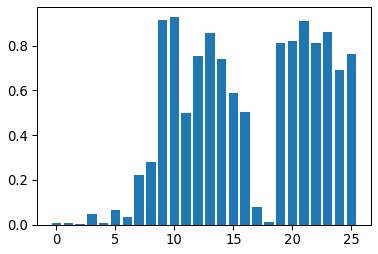

In [205]:
plt.bar(x=np.arange(26),height=pose[2::3])

In [87]:
json_to_csv_pose(path)

RHip 12
RKnee 14
RAnkle 16
LHip 11
LKnee 13
LAnkle 15
LBigToe 20
LSmallToe 22
LHeel 24
RBigToe 21
RSmallToe 23
RHeel 25
{'RHip_x': 36, 'RHip_y': 37, 'RHip_c': 38, 'RKnee_x': 42, 'RKnee_y': 43, 'RKnee_c': 44, 'RAnkle_x': 48, 'RAnkle_y': 49, 'RAnkle_c': 50, 'LHip_x': 33, 'LHip_y': 34, 'LHip_c': 35, 'LKnee_x': 39, 'LKnee_y': 40, 'LKnee_c': 41, 'LAnkle_x': 45, 'LAnkle_y': 46, 'LAnkle_c': 47, 'LBigToe_x': 60, 'LBigToe_y': 61, 'LBigToe_c': 62, 'LSmallToe_x': 66, 'LSmallToe_y': 67, 'LSmallToe_c': 68, 'LHeel_x': 72, 'LHeel_y': 73, 'LHeel_c': 74, 'RBigToe_x': 63, 'RBigToe_y': 64, 'RBigToe_c': 65, 'RSmallToe_x': 69, 'RSmallToe_y': 70, 'RSmallToe_c': 71, 'RHeel_x': 75, 'RHeel_y': 76, 'RHeel_c': 77}
[539.502685546875, -53.84814453125, 0.007914349436759949, 487.10888671875, 54.021480560302734, 0.07745074480772018, 536.4207153320312, 35.529544830322266, 0.034950561821460724, 548.7486572265625, 17.037609100341797, 0.27973127365112305, 628.88037109375, 60.18545913696289, 0.9263448119163513, 425.469085

IndexError: list index out of range

In [6]:
filename = 'AlphaPose_SS02_3FU_SSV1_Brace_Cropped-results-OPformat'

In [9]:
filename = path/'0.json'
filename

PosixPath('/Users/luca/Box/Spinal Stim/Alphapose/sep-json/0.json')

In [88]:
poses = pd.DataFrame()
file = filename
with open(file) as f:
        try:
            data=json.load(f)
        except('UnicodeDecodeError'):
            print('cannot parse ',str(file))


In [89]:
data.keys()

dict_keys(['version', 'people'])

In [90]:
len(data['people'])

2

In [120]:
data0 = data['people'][0]

In [121]:
np.array(data0['pose_keypoints_2d']).shape

(54,)

In [26]:
data['people'][1].items()

dict_items([('pose_keypoints_2d', [1052.4927978515625, 26.792465209960938, 0.7138434052467346, 1039.5152587890625, 6.515013694763184, 0.6790037751197815, 1021.6710815429688, 47.88101577758789, 0.38453376293182373, 1039.9207763671875, 75.86389923095703, 0.054526131600141525, 1067.0926513671875, 42.203330993652344, 0.04254651442170143, 1011.9378662109375, 46.258819580078125, 0.2670224905014038, 1015.1822509765625, 73.8361587524414, 0.037648968398571014, 1018.4266967773438, 38.95893859863281, 0.024001389741897583, 1031.809814453125, 75.86389923095703, 0.038683004677295685, 1037.89306640625, 22.736976623535156, 0.037350576370954514, 1020.8599853515625, 47.88101577758789, 0.04522278532385826, 1031.809814453125, 75.86389923095703, 0.023514248430728912, 1040.3262939453125, 16.248191833496094, 0.01484888605773449, 1027.3487548828125, 55.18090057373047, 0.018756290897727013, 1048.4373779296875, 19.492584228515625, 0.7522311210632324, 1052.4927978515625, 20.303680419921875, 0.7101061940193176, 1

In [54]:
#//26 body keypoints
d={0:  "Nose",
1:  "LEye",
2:  "REye",
3:  "LEar",
4:  "REar",
5:  "LShoulder",
6:  "RShoulder",
7:  "LElbow",
8:  "RElbow",
9:  "LWrist",
10: "RWrist",
11: "LHip",
12: "RHip",
13: "LKnee",
14: "Rknee",
15: "LAnkle",
16: "RAnkle",
17:  "Head",
18:  "Neck",
19:  "Hip",
20: "LBigToe",
21: "RBigToe",
22: "LSmallToe",
23: "RSmallToe",
24: "LHeel",
25: "RHeel"}

In [58]:
d2 = {k:v for v,k in d.items()}

In [59]:
d2

{'Nose': 0,
 'LEye': 1,
 'REye': 2,
 'LEar': 3,
 'REar': 4,
 'LShoulder': 5,
 'RShoulder': 6,
 'LElbow': 7,
 'RElbow': 8,
 'LWrist': 9,
 'RWrist': 10,
 'LHip': 11,
 'RHip': 12,
 'LKnee': 13,
 'Rknee': 14,
 'LAnkle': 15,
 'RAnkle': 16,
 'Head': 17,
 'Neck': 18,
 'Hip': 19,
 'LBigToe': 20,
 'RBigToe': 21,
 'LSmallToe': 22,
 'RSmallToe': 23,
 'LHeel': 24,
 'RHeel': 25}